In [75]:
try:
    import numpy as np
except Exception:
    pass
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [76]:
from sklearn.linear_model import LinearRegression

In [77]:
import seaborn as sns
titanic=sns.load_dataset('titanic')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [78]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [79]:
titanic.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

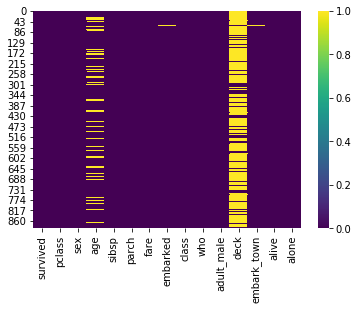

In [80]:
sns.heatmap(titanic.isnull(),cbar=True,cmap='viridis')

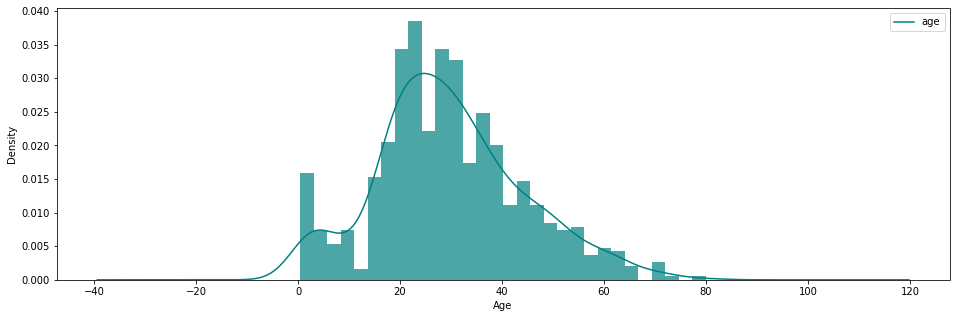

In [81]:
ax=titanic['age'].hist(bins=30, density=True, stacked=True, color='teal',alpha=0.7, figsize=(16,5))
titanic['age'].plot(kind='density',color='teal',legend=True)
ax.set_xlabel('Age')
plt.show()

Text(0.5, 1.0, 'male')

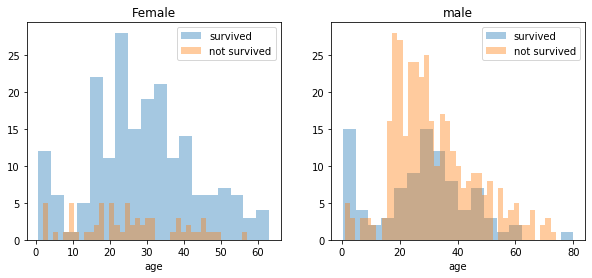

In [82]:
survived='survived'
not_survived='not survived'
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(10,4))
women=titanic[titanic['sex']=='female']
men=titanic[titanic['sex']=='male']
ax=sns.distplot(women[women[survived]==1].age.dropna(),bins=18, label=survived,ax=axes[0],kde=False)
ax=sns.distplot(women[women[survived]==0].age.dropna(),bins=40, label=not_survived,ax=axes[0],kde=False)
ax.legend()
ax.set_title('Female')

ax=sns.distplot(men[men[survived]==1].age.dropna(),bins=18, label=survived,ax=axes[1],kde=False)
ax=sns.distplot(men[men[survived]==0].age.dropna(),bins=40, label=not_survived,ax=axes[1],kde=False)
ax.legend()
ax.set_title('male')


In [83]:
titanic.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [84]:
titanic['sex'].value_counts()

male      577
female    314
Name: sex, dtype: int64

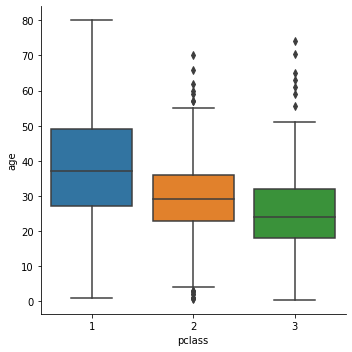

In [85]:
sns.catplot(x='pclass',y='age',data=titanic,kind='box')

In [86]:
def impute_age(cols):
    age=cols[0]
    pclass=cols[1]
    if pd.isnull(age):
        if pclass==1:
            return titanic[titanic['pclass']==1]['age'].mean()
        elif pclass==2:
            return titanic[titanic['pclass']==2]['age'].mean()
        elif pclass==3:
            return titanic[titanic['pclass']==3]['age'].mean()
    else:
        return age
        

In [87]:
titanic['age']=titanic[['age','pclass']].apply(impute_age, axis=1)

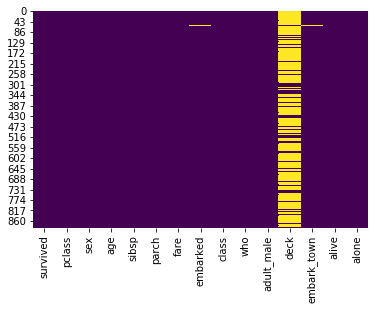

In [88]:
sns.heatmap(titanic.isnull(),cbar=False,cmap='viridis')

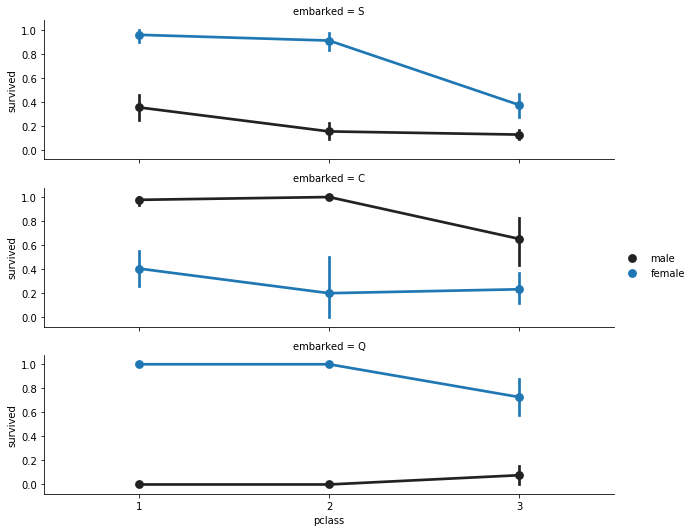

In [89]:
f=sns.FacetGrid(titanic,row='embarked', height=2.5, aspect=3.5)
f.map(sns.pointplot,'pclass','survived','sex',order=None,hue_order=None)
f.add_legend()

In [90]:
titanic['embarked'].isnull().sum()

2

In [91]:
titanic['embark_town'].value_counts()

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

In [92]:
common_value='S'
titanic['embarked'].fillna(common_value,inplace=True)

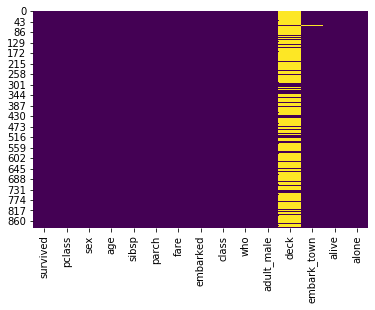

In [93]:
sns.heatmap(titanic.isnull(),cbar=False,cmap='viridis')

In [94]:
titanic.drop(labels=['deck','embark_town','alive'],inplace=True,axis=1)

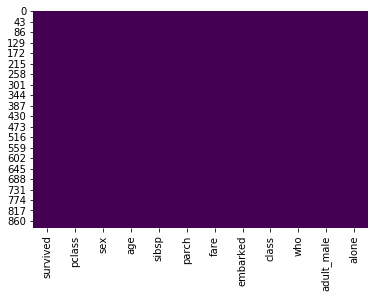

In [95]:
sns.heatmap(titanic.isnull(),cbar=False,cmap='viridis')

In [96]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alone
0,0,3,male,22.00000,1,0,7.2500,S,Third,man,True,False
1,1,1,female,38.00000,1,0,71.2833,C,First,woman,False,False
2,1,3,female,26.00000,0,0,7.9250,S,Third,woman,False,True
3,1,1,female,35.00000,1,0,53.1000,S,First,woman,False,False
4,0,3,male,35.00000,0,0,8.0500,S,Third,man,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.00000,0,0,13.0000,S,Second,man,True,True
887,1,1,female,19.00000,0,0,30.0000,S,First,woman,False,True
888,0,3,female,25.14062,1,2,23.4500,S,Third,woman,False,False
889,1,1,male,26.00000,0,0,30.0000,C,First,man,True,True


In [97]:
titanic['fare']=titanic['fare'].astype('int')
titanic['age']=titanic['age'].astype('int')
titanic['pclass']=titanic['pclass'].astype('int')

In [98]:
gender={'male':0,'female':1}
titanic['sex']=titanic['sex'].map(gender)

In [99]:
who={'man':0,'woman':1}
titanic['who']=titanic['who'].map(who)

In [100]:
alone={True:1,False:0}
titanic['alone']=titanic['alone'].map(alone)

In [101]:
adult_male={True:1,False:0}
titanic['adult_male']=titanic['adult_male'].map(adult_male)

In [102]:
embarked={'S':0,'C':1,'Q':2}
titanic['embarked']=titanic['embarked'].map(embarked)

In [103]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alone
0,0,3,0,22,1,0,7,0,Third,0.0,1,0
1,1,1,1,38,1,0,71,1,First,1.0,0,0
2,1,3,1,26,0,0,7,0,Third,1.0,0,1
3,1,1,1,35,1,0,53,0,First,1.0,0,0
4,0,3,0,35,0,0,8,0,Third,0.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27,0,0,13,0,Second,0.0,1,1
887,1,1,1,19,0,0,30,0,First,1.0,0,1
888,0,3,1,25,1,2,23,0,Third,1.0,0,0
889,1,1,0,26,0,0,30,1,First,0.0,1,1


In [104]:
titanic.drop(labels=['class','who'],axis=1,inplace=True)

In [105]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,adult_male,alone
0,0,3,0,22,1,0,7,0,1,0
1,1,1,1,38,1,0,71,1,0,0
2,1,3,1,26,0,0,7,0,0,1
3,1,1,1,35,1,0,53,0,0,0
4,0,3,0,35,0,0,8,0,1,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27,0,0,13,0,1,1
887,1,1,1,19,0,0,30,0,0,1
888,0,3,1,25,1,2,23,0,0,0
889,1,1,0,26,0,0,30,1,1,1


In [106]:
x=titanic.drop(labels=['survived'],axis=1)
y=titanic['survived']

In [107]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [108]:
X_train, X_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [109]:
X_train.shape

(712, 9)

In [110]:
model=LogisticRegression(solver='lbfgs',max_iter=400)
model.fit(X_train,y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=400,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [111]:
y_predict=model.predict(X_test)
model.score(X_test,y_test)


0.8156424581005587

In [112]:
a=pd.DataFrame(data=[y_predict,y_test])
a.T

,0,1
0,0,0
1,0,0
2,0,0
3,1,1
4,1,1
...,...,...
174,1,1
175,0,0
176,1,1
177,0,0


In [113]:
from sklearn.feature_selection import RFE
model=LogisticRegression(solver='lbfgs',max_iter=500)
rfe=RFE(model,5,verbose=1)
rfe=rfe.fit(x,y)

Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.


In [114]:
rfe.support_

array([ True, False, False,  True,  True, False, False,  True,  True])

In [115]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,adult_male,alone
0,0,3,0,22,1,0,7,0,1,0
1,1,1,1,38,1,0,71,1,0,0
2,1,3,1,26,0,0,7,0,0,1
3,1,1,1,35,1,0,53,0,0,0
4,0,3,0,35,0,0,8,0,1,1


In [116]:
xx=x[x.columns[rfe.support_]]
xx

,pclass,sibsp,parch,adult_male,alone
0,3,1,0,1,0
1,1,1,0,0,0
2,3,0,0,0,1
3,1,1,0,0,0
4,3,0,0,1,1
...,...,...,...,...,...
886,2,0,0,1,1
887,1,0,0,0,1
888,3,1,2,0,0
889,1,0,0,1,1


In [117]:
X_train, X_test, y_train, y_test=train_test_split(xx,y,test_size=0.2,random_state=8,stratify=y)

In [118]:
model=LogisticRegression(solver='lbfgs',max_iter=400)
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=400,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [119]:
y_predict=model.predict(X_test)
model.score(X_test,y_test)

0.8547486033519553

In [138]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,classification_report,precision_score,recall_score,confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,log_loss



In [139]:
model=LogisticRegression(solver='lbfgs',max_iter=400)
model.fit(X_train,y_train)
y_predict=model.predict(X_test)
y_predict

array([1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0], dtype=int64)

In [140]:
y_predict_prob=model.predict_proba(X_test)[:,1]

In [141]:
[fpr,tpr,thr]=roc_curve(y_test,y_predict_prob)

In [142]:
print('Accuracy: ', accuracy_score(y_test,y_predict))
print('Log loss: ', log_loss(y_test,y_predict_prob))
print('auc: ',auc(fpr,tpr))

Accuracy:  0.8547486033519553
Log loss:  0.36597373727139876
auc:  0.9007246376811595


In [130]:
type(y_test)

pandas.core.series.Series

In [ ]:
idx=np.min(np.where(tpr>0.95))
idx

In [ ]:
l=[1,2,3]
a=list(map(lambda x:x+1,l))
a

In [ ]:
z=list(map(lambda x:list(bin(p^x)[2:]),l))
    z1=list(filter(lambda x:x.count('1')%2==0,z))
    z2=list(filter(lambda x:x.count('1')%2!=0,z))
    print(len(z1),len(z2))
            

In [ ]:
from collections import deque
moves=[[0 for i in range(8)] for j in range(8)]
count=0
x=[-1,-1,1,1]
y=[-1,1,1,-1]
xq=deque()
yq=deque()
def is_safe(x,y):
	return (x>=0 and x<=7 and y>=0 and y<=7)
xq.append(4)
yq.append(5)
while(len(xq)>0):
	count+=1
	xx=xq.popleft()
	yy=yq.popleft()
	if count>=128:
		break

	
	moves[xx][yy]+=1

	for i in range(4):
		xx=xx+x[i]
		yy=yy+y[i]
		if is_safe(xx,yy):
			xq.append(xx)
			yq.append(yy)

print(moves)

In [ ]:
p=int(input())
        z1=list(filter(lambda x:list(bin(p^x)[2:]).count('1')%2==0,l))
        stdout.write(str(len(z1))+' '+str((len(l)-len(z1)))
            

In [ ]:
#titanic['age'].mean()

In [ ]:
#titanic['age']=titanic['age'].replace(np.nan,titanic['age'].mean())

In [ ]:
def even(p,l):
    c_odd=0
    c_even=0
    for i in l:
        if i%2!=0 and p!=i:
            c_odd=c_odd+1
        elif i%2==0 and p!=i:
            c_even=c_even+1
    print(c_odd,c_even)

def odd(p,l):
    c_odd=0
    c_even=0
    for i in l:
        if i%2!=0 and p!=i:
            c_even=c_even+1
        elif i%2==0 and p!=i:
            c_odd=c_odd+1
    print(c_odd,c_even)
            
from sys import stdin, stdout
for i in range(int(input())):
    l1=[]
    l2=[]
    l_p=[]
    n,q=input().split()
    n=int(n)
    q=int(q)
    l=[int(x) for x in stdin.readline().split()] 
    for _ in range(q):
        p=input()
        if p%2==0:
            even(p,l)
        else:

            odd(p,l)

In [ ]:
def check_diagonal(rt,ct):
    for i in range(rt,2*rt):
        for j in range(ct,2*ct):
            
global (rs,cs)=(1,1)
l=[]
for i in range(1,9):
    rt=i
    for ct in range(1,9):
        if rs+cs=rt+ct  or rs−cs=rt−ct:
            l.append((rt,ct))
            (rs,cs)=(rt,ct)
            check_digonal(rt,ct)
            
            
            
        
        
        
        

In [ ]:
def findParity(x): 
    y = x ^ (x >> 1) 
    y = y ^ (y >> 2) 
    y = y ^ (y >> 4)
    y = y ^ (y >> 8) 
    y = y ^ (y >> 16)
    if (y & 1): 
        return 1
    return 0


def calculate(p,l):
    e=0
    o=0
    a=map(lambda x:p^x,l)
            
            
from sys import stdin, stdout
for i in range(int(input())):
    l1=[]
    l2=[]
    a=[int(x) for x in stdin.readline().split()]
    n=a[0]
    q=a[1]
    l=[int(x) for x in stdin.readline().split()] 
    for _ in range(q):
        p=int(input())
        calculate(p,l)
        

In [ ]:
def findParity(x): 
    y = x ^ (x >> 1) 
    y = y ^ (y >> 2) 
    y = y ^ (y >> 4)
    y = y ^ (y >> 8) 
    y = y ^ (y >> 16)
    if (y & 1): 
        return 1; 
    return 0
